In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('water_potability.csv')

In [3]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
for i in df.columns:
    print(f' {i} :- {df[i].nunique()} which are {df[i].unique()}')
    print('-----------------------***---------------------------***---------------------------','\n')

 ph :- 2785 which are [       nan 3.71608008 8.09912419 ... 9.41951032 5.12676292 7.87467136]
-----------------------***---------------------------***--------------------------- 

 Hardness :- 3276 which are [204.89045547 129.42292051 224.23625939 ... 175.7626463  230.60375751
 195.10229859]
-----------------------***---------------------------***--------------------------- 

 Solids :- 3276 which are [20791.31898075 18630.05785797 19909.54173229 ... 33155.57821831
 11983.86937634 17404.17706105]
-----------------------***---------------------------***--------------------------- 

 Chloramines :- 3276 which are [7.30021187 6.63524588 9.2758836  ... 7.35023323 6.30335653 7.50930586]
-----------------------***---------------------------***--------------------------- 

 Sulfate :- 2495 which are [368.51644135          nan 356.88613564 ... 258.93060041 345.70025734
 359.94857437]
-----------------------***---------------------------***--------------------------- 

 Conductivity :- 3276 whi

In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## check for null values

In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
df=df.replace(['-','_','null','Null','NULL','NA','Na','na','?'],np.nan) #crosschecking

In [11]:
df.isnull().sum()/len(df)*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

here Trihalomethanes content 5% null values 
we will check this columns correlation with target variable and if needed we will drop those null values
for sulfate and ph we will impute values because percent nullvalue is very high

## check for outliers

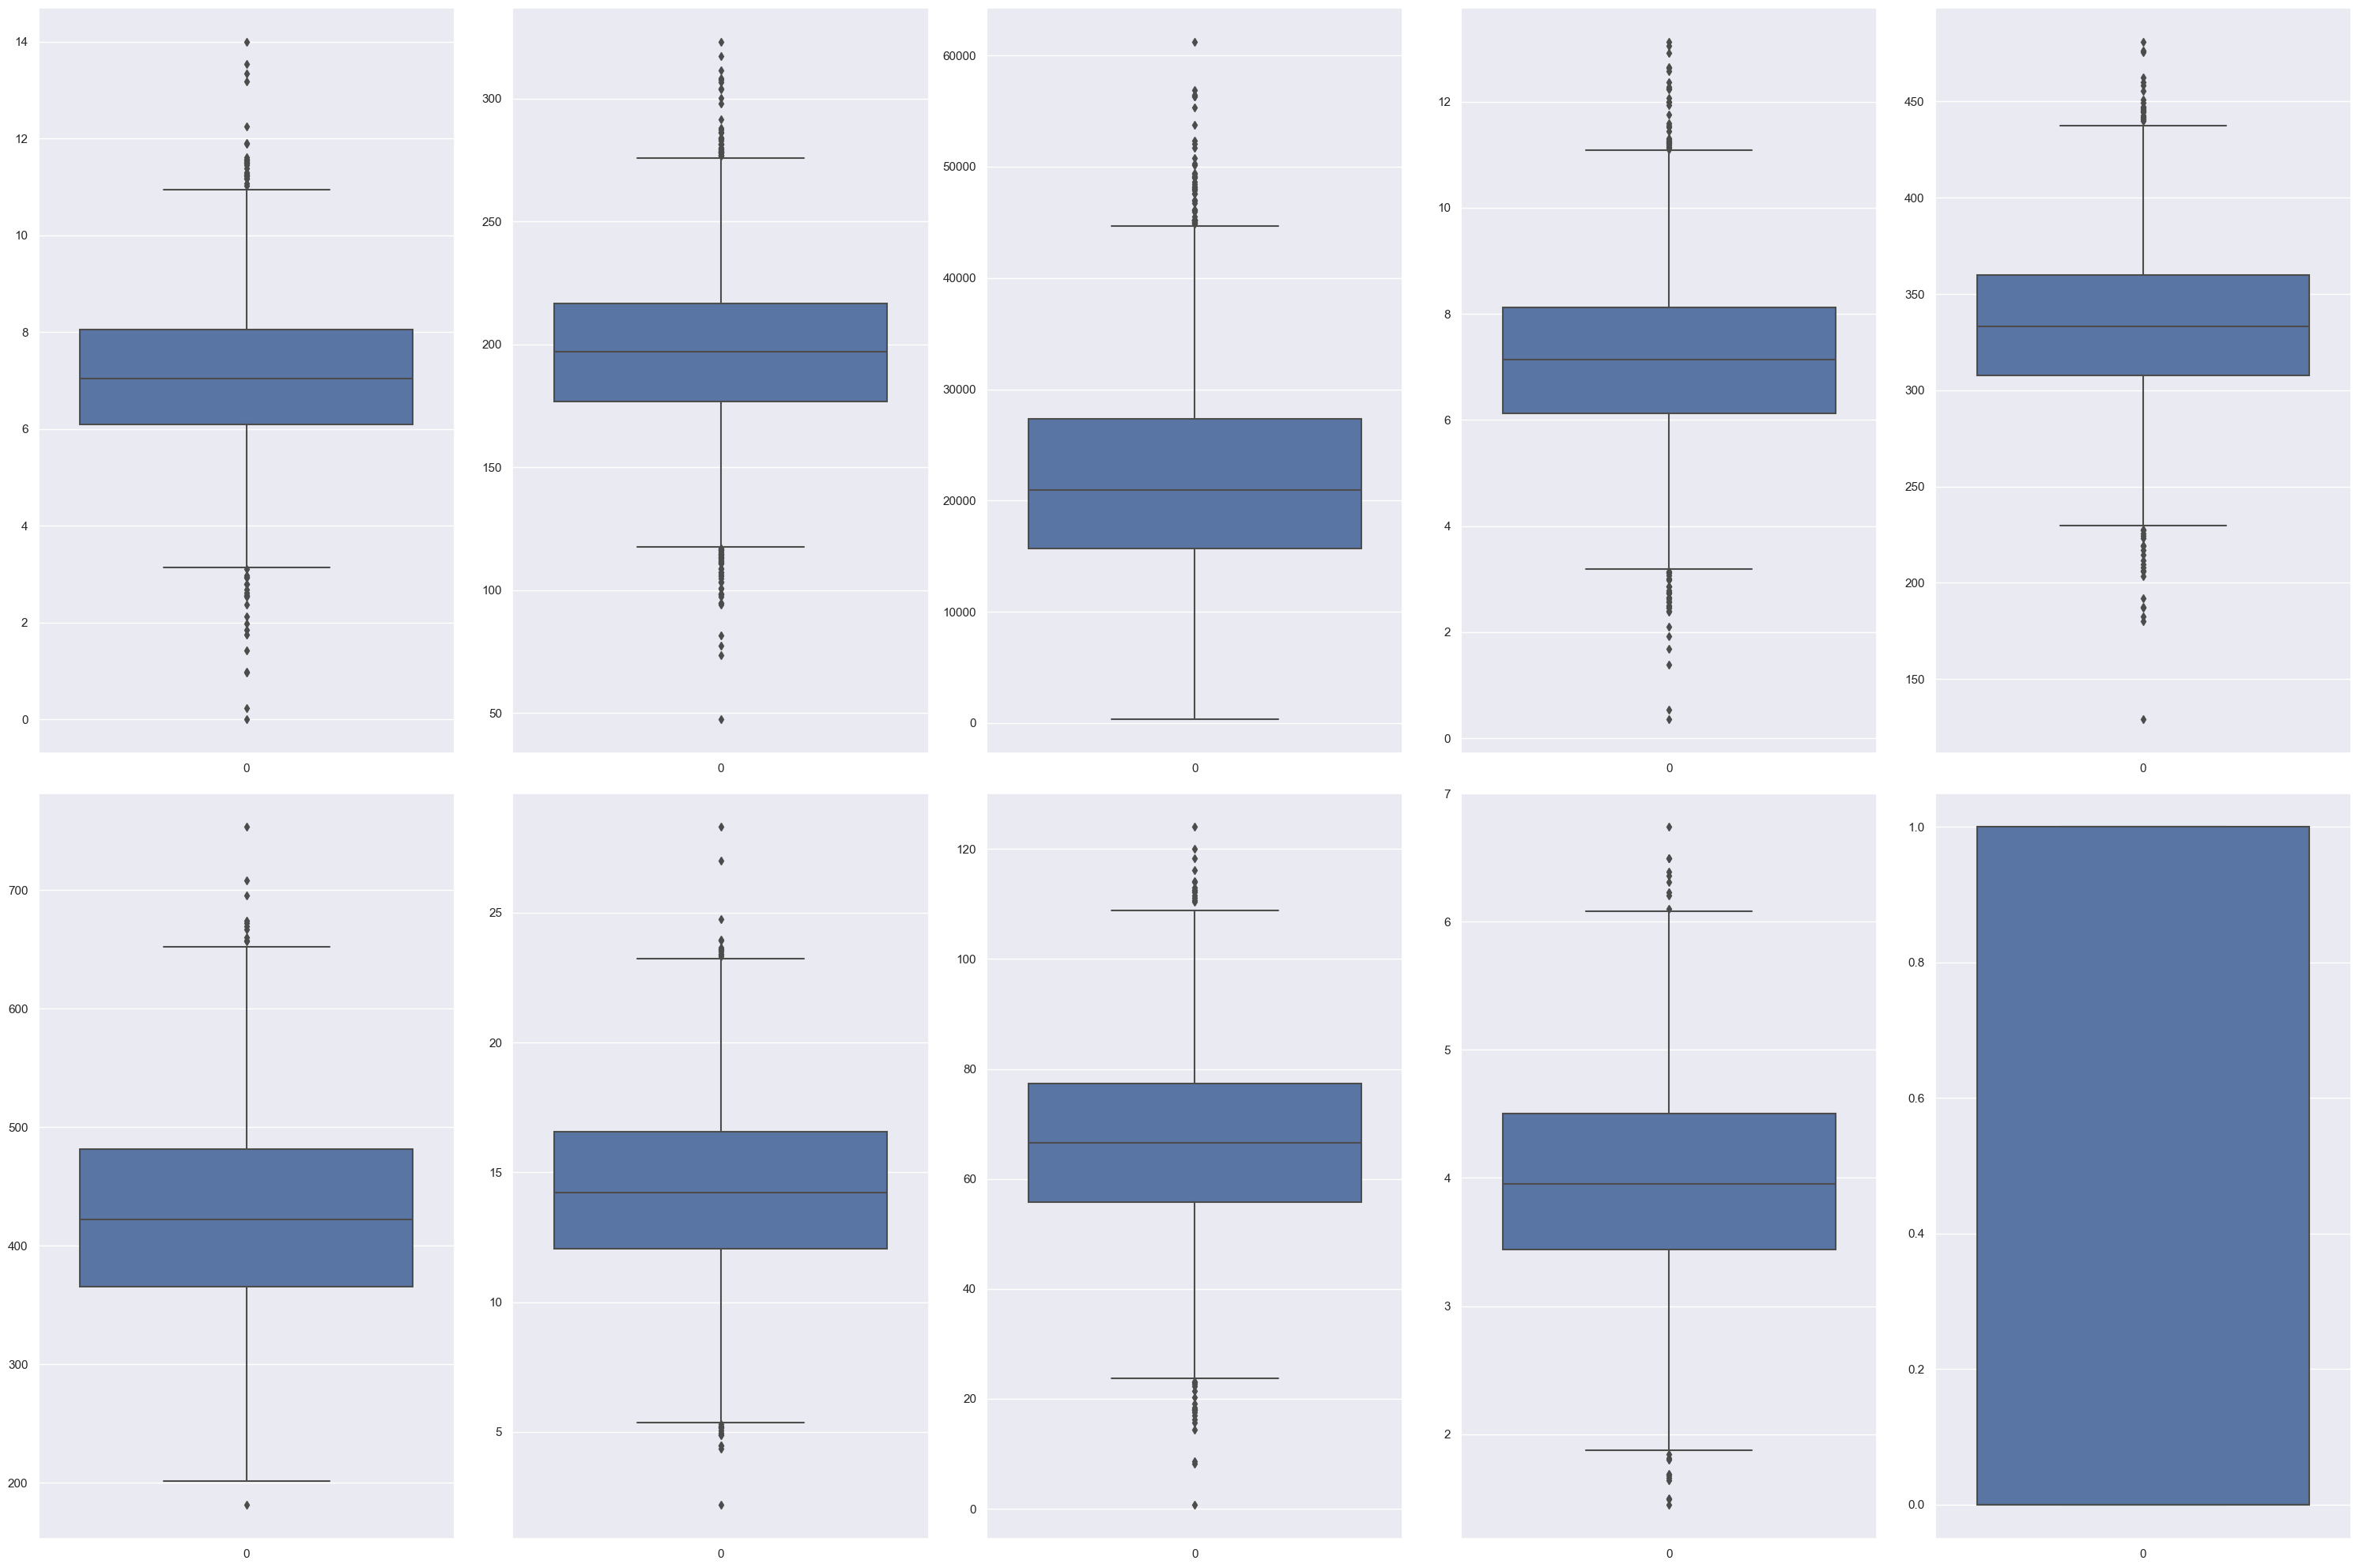

In [12]:
plt.figure(figsize=(30,20))
x=1

for i in df.columns:
    plt.subplot(2,5,x)
    sns.boxplot(df[i])
    x+=1
plt.tight_layout()

here almost every column has some outliers except target variable so later we will do standardization or other scaling 
to avoid the effect of outlier

## pre-processing

In [13]:
# def capping(df):
#     q25=np.percentile(df,25)
#     q75=np.percentile(df,75)
#     IQR=q75-q25
#     ll=q25-1.5*IQR
#     ul=q75+1.5*IQR
#     return df.apply(lambda x:np.nan if x>ul else x).apply(lambda x:np.nan if x<ll else x)

In [14]:
# for i in df:
#     df[i]=capping(df[i])

In [41]:
#  for null values we will use knn immputer
# from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [16]:
# def knnimp(df):
#     imputer=KNNImputer(n_neighbors=7)
#     df_imputed=imputer.fit_transform(df)
#     df_imputed=pd.DataFrame(df_imputed,columns=df.columns)
#     return df_imputed

In [100]:
def simpleimp(df):
    imputer=SimpleImputer(strategy='mean')
    df_imputed=imputer.fit_transform(df)
    df_imputed=pd.DataFrame(df_imputed,columns=df.columns)
    return df_imputed

In [101]:
df1=simpleimp(df)

In [102]:
df1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,21624.156607,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1.0


## lets do some EDA part

<Axes: ylabel='ph'>

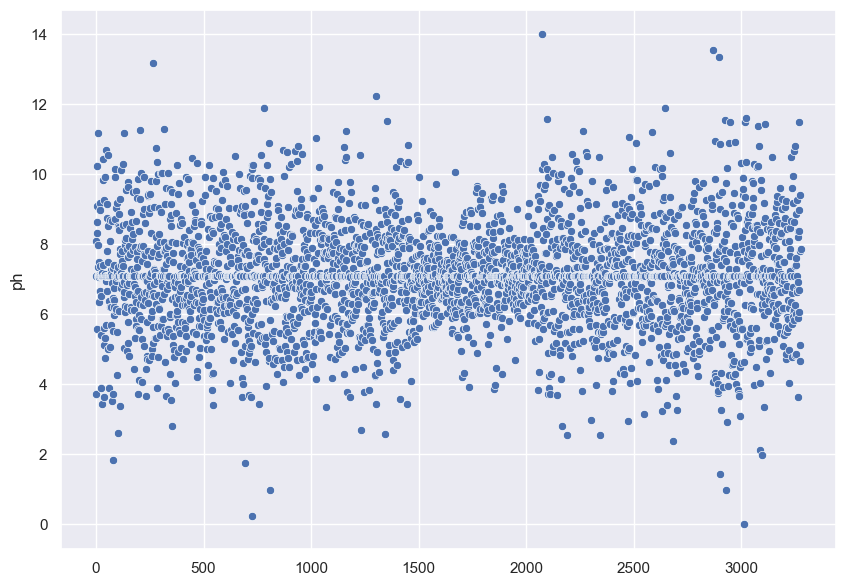

In [103]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df1.index,y=df1['ph'])

majority of data lies in neutral to sligh acidic or alkaline range

<Axes: xlabel='Hardness', ylabel='Density'>

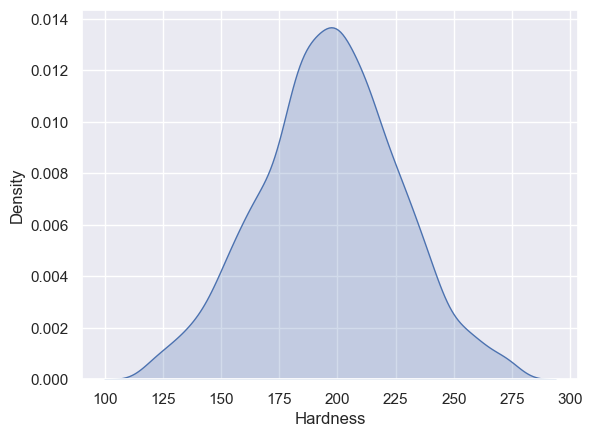

In [104]:
sns.kdeplot(df['Hardness'],fill=True)

In [105]:
df1['pot']=['Potable' if i == 1 else 'non potable' for i in df1['Potability']]

<Axes: xlabel='pot', ylabel='Sulfate'>

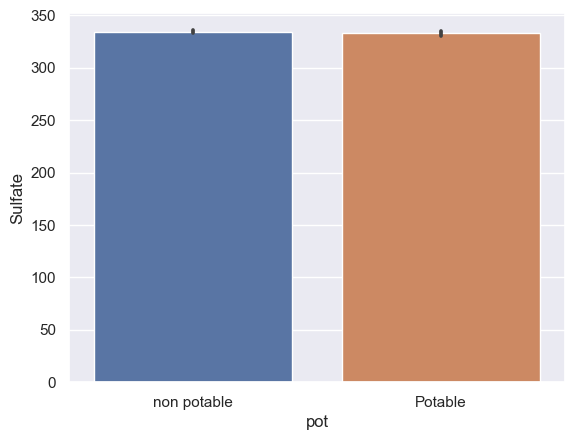

In [106]:
sns.barplot(y='Sulfate',x='pot',data=df1)

In [107]:
df1['ph_r']=['acidic' if i < 5.5 else 'slightly acidic' if 5.5<=i<6.5 else 'neutral' if 6.5<=i<=7.5 else 'slightly alkaline'
           if 7.5<i<=8.5 else 'alkaline' for i in df1['ph']]

<Axes: xlabel='ph_r', ylabel='count'>

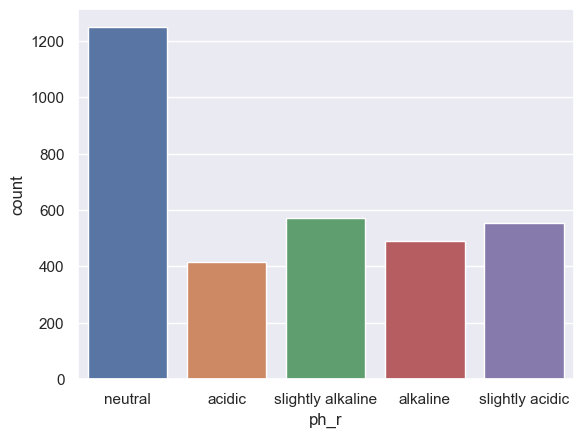

In [108]:
sns.countplot(x=df1['ph_r'])

In [109]:
cor=df1.corr()

<Axes: >

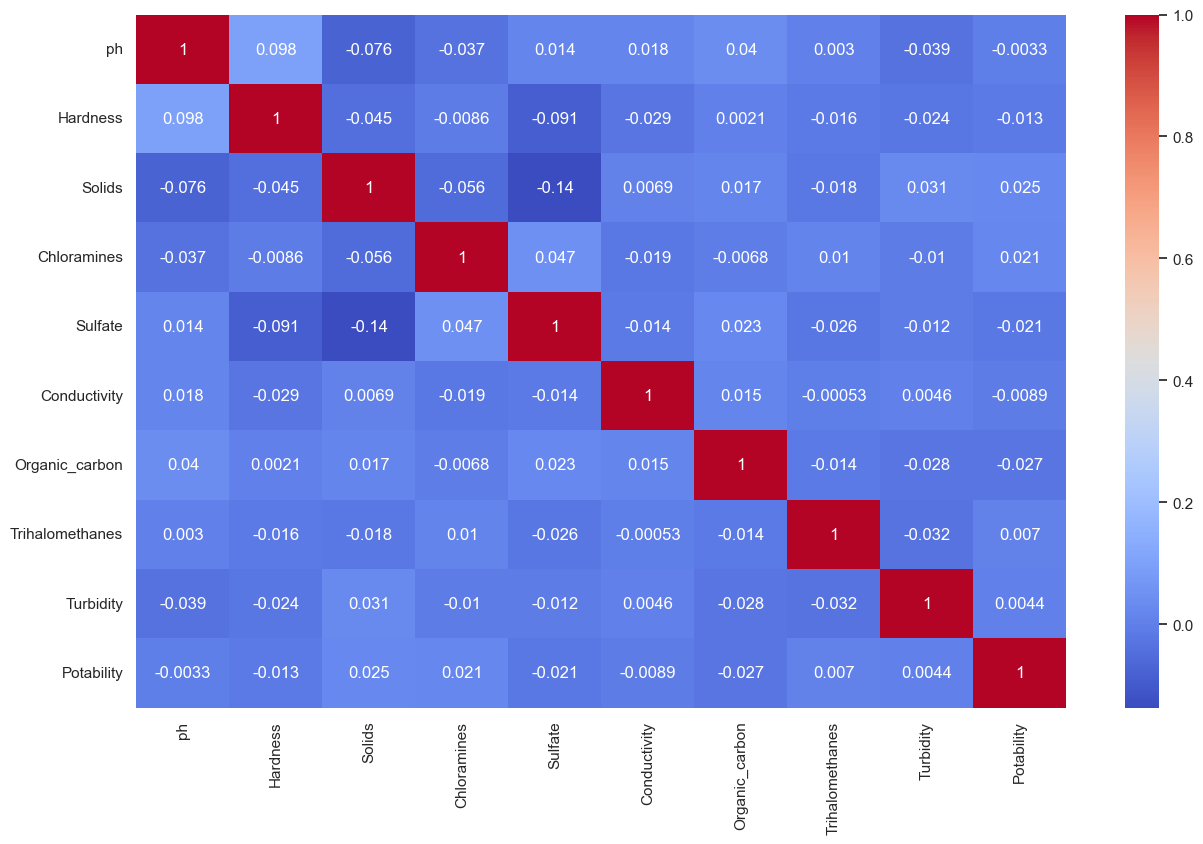

In [110]:
plt.figure(figsize=(15,9))
sns.heatmap(cor,cmap='coolwarm',annot=True)

In [111]:
df1.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,pot,ph_r
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0,non potable,neutral
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0,non potable,acidic
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0,non potable,slightly alkaline
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0,non potable,slightly alkaline
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0,non potable,alkaline


In [112]:
x=df1.iloc[:,:-3]
y=df1['Potability']

In [113]:
x.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [114]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3271    1.0
3272    1.0
3273    1.0
3274    1.0
3275    1.0
Name: Potability, Length: 3276, dtype: float64

## Data spliting

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

## model building


In [117]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [118]:
models={
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'Logistic regression':LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=3),
    'random forest':RandomForestClassifier(),
    'XGB':XGBClassifier()
}

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
def evaluation_model(x_train,y_train,x_test,y_test,models):
    report={}
    
    for i in range(len(models)):
        model=list(models.values())[i]
        
        model.fit(x_train,y_train)
        
        y_pred_train=model.predict(x_train)
        y_pred_test=model.predict(x_test)
        
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred_test)
        
        report[list(models.keys())[i]] =f'training accuracy:- {train_accuracy}, testing accuracy:- {test_accuracy}'
        
    return report
    

In [121]:
evaluation_model(x_train,y_train,x_test,y_test,models)

{'KNN': 'training accuracy:- 0.6659398168338422, testing accuracy:- 0.5859613428280773',
 'Logistic regression': 'training accuracy:- 0.6083733100741386, testing accuracy:- 0.6134282807731435',
 'Decision Tree': 'training accuracy:- 0.6524204099433057, testing accuracy:- 0.6215666327568667',
 'random forest': 'training accuracy:- 1.0, testing accuracy:- 0.6551373346897253',
 'XGB': 'training accuracy:- 0.9973833406018316, testing accuracy:- 0.6439471007121058'}

In [122]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gcv=GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
gcv.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_sear

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
https://careers.cult.fit/#!/job-view/business-analyst-bangalore-business-analysis-2023081811283322